In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Injury Record
note: graphs are ugly, make them look better later

In [15]:
df = pd.read_csv('InjuryRecord.csv')

In [16]:
df.head()

,PlayerKey,GameID,PlayKey,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42
0,39873,39873-4,39873-4-32,Knee,Synthetic,1,1,1,1
1,46074,46074-7,46074-7-26,Knee,Natural,1,1,0,0
2,36557,36557-1,36557-1-70,Ankle,Synthetic,1,1,1,1
3,46646,46646-3,46646-3-30,Ankle,Natural,1,0,0,0
4,43532,43532-5,43532-5-69,Ankle,Synthetic,1,1,1,1


In [22]:
len(df['PlayerKey'].unique())

100

In [5]:
df['BodyPart'].value_counts()

Knee     48
Ankle    42
Foot      7
Toes      7
Heel      1
Name: BodyPart, dtype: int64

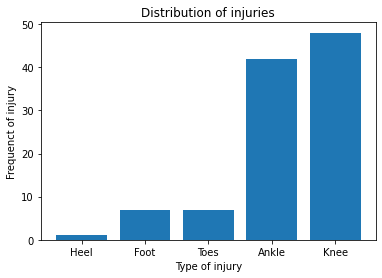

In [54]:
# plot injury distribution
df_injury = df.groupby('BodyPart').count().reset_index()[['PlayerKey', 'BodyPart']].sort_values(by='PlayerKey')
plt.bar(df_injury['BodyPart'], df_injury['PlayerKey'])
plt.title('Distribution of injuries')
plt.xlabel('Type of injury')
plt.ylabel('Frequenct of injury')
plt.show()

Give an explanation as to why we see ankle and knee injuries more often

<function matplotlib.pyplot.show(close=None, block=None)>

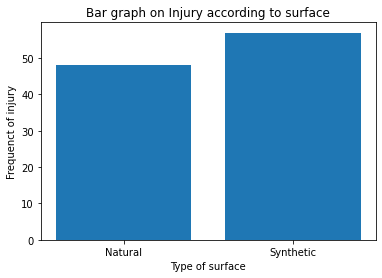

In [29]:
# plot injury vs surface
df_surface = df[['DM_M1', 'Surface']].groupby(by='Surface').count().reset_index()
plt.bar(df_surface['Surface'], df_surface['DM_M1'])
plt.title('Bar graph on Injury according to surface')
plt.xlabel('Type of surface')
plt.ylabel('Frequenct of injury')
plt.show

In [30]:
df_surface.head() # T test to check for difference?

,Surface,DM_M1
0,Natural,48
1,Synthetic,57


In [17]:
# add a column for 'severity' of injury, example DM_M1 = 1, DM_M42 = 4
df['Severity'] = df['DM_M1'] + df['DM_M7'] + df['DM_M28'] + df['DM_M42']

In [18]:
df.head()

,PlayerKey,GameID,PlayKey,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42,Severity
0,39873,39873-4,39873-4-32,Knee,Synthetic,1,1,1,1,4
1,46074,46074-7,46074-7-26,Knee,Natural,1,1,0,0,2
2,36557,36557-1,36557-1-70,Ankle,Synthetic,1,1,1,1,4
3,46646,46646-3,46646-3-30,Ankle,Natural,1,0,0,0,1
4,43532,43532-5,43532-5-69,Ankle,Synthetic,1,1,1,1,4


In [152]:
df_severity = df.groupby(by='Severity')['Surface'].value_counts()
df_severity = df_severity.unstack()

In [184]:
df_severity

Surface,Natural,Synthetic
Severity,,
1,13,16
2,20,19
3,2,6
4,13,16


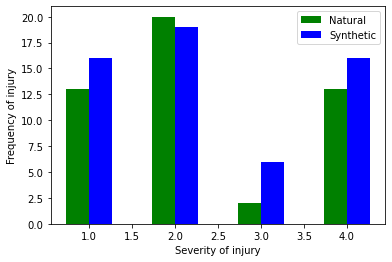

In [252]:
# severity of injury in regards to surface
N = 3
ind = np.arange(N)  # the x locations for the groups
width = 0.27        # the width of the bars

ax = plt.subplot(111)
ax.bar(df_severity.index-width/2, df_severity['Natural'], width=width, color='green')
ax.bar(df_severity.index+width/2, df_severity['Synthetic'], width=width, color='blue')

plt.xlabel('Severity of injury')
plt.ylabel('Frequency of injury')
plt.title('')
plt.legend(['Natural', 'Synthetic'])

plt.show()

In [254]:
# do injury per type of surface as well?
injury_surface = df.groupby(by='Surface')['BodyPart'].value_counts()
injury_surface = injury_surface.unstack()

In [256]:
injury_surface.fillna(0, inplace=True)
injury_surface

BodyPart,Ankle,Foot,Heel,Knee,Toes
Surface,,,,,
Natural,17.0,5.0,1.0,24.0,1.0
Synthetic,25.0,2.0,0.0,24.0,6.0


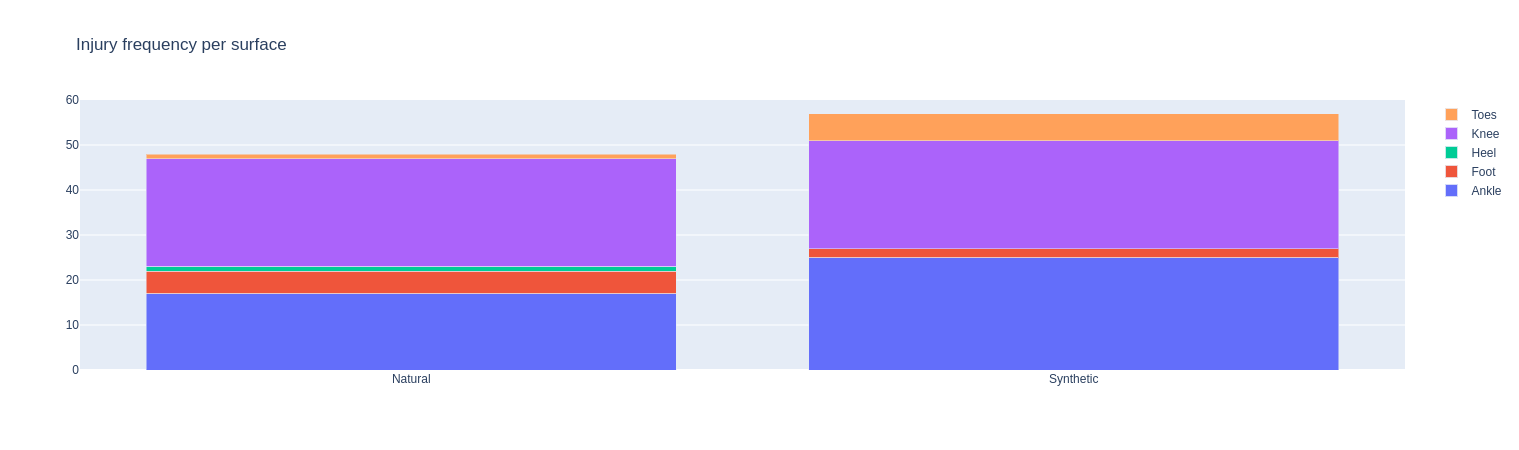

In [257]:
data = [
    go.Bar(                                                  # trace 1
    x = [inj for inj in injury_surface.index],
    y = [value for value in injury_surface['Ankle']],
    name = 'Ankle'), 
    
    go.Bar(                                                  # trace 2
    x = [inj for inj in injury_surface.index],
    y = [value for value in injury_surface['Foot']],
    name = 'Foot'),
    
    go.Bar(                                                  # trace 3
    x = [inj for inj in injury_surface.index],
    y = [value for value in injury_surface['Heel']],
    name = 'Heel'),
    
    go.Bar(                                                  # trace 4
    x = [inj for inj in injury_surface.index],
    y = [value for value in injury_surface['Knee']],
    name = 'Knee'),
    
    go.Bar(                                                  # trace 5
    x = [inj for inj in injury_surface.index],
    y = [value for value in injury_surface['Toes']],
    name = 'Toes')
]
        
# create a layout, remember to set the barmode here

layout = go.Layout(
    title = 'Injury frequency per surface'
)


# create a fig from data & layout, and plot the fig.

fig = go.Figure(data=data, layout=layout)
fig.update_layout(barmode = 'stack')
fig.show()

In [196]:
# severity of injury in regards to type of injury
df_severity2 = df.groupby(by='Severity')['BodyPart'].value_counts()
df_severity2 = df_severity2.unstack()

In [208]:
df_severity2.fillna(0, inplace=True)
df_severity2

BodyPart,Ankle,Foot,Heel,Knee,Toes
Severity,,,,,
1,16.0,0.0,0.0,11.0,2.0
2,13.0,0.0,1.0,21.0,4.0
3,2.0,2.0,0.0,3.0,1.0
4,11.0,5.0,0.0,13.0,0.0


In [246]:
import plotly.graph_objs as go

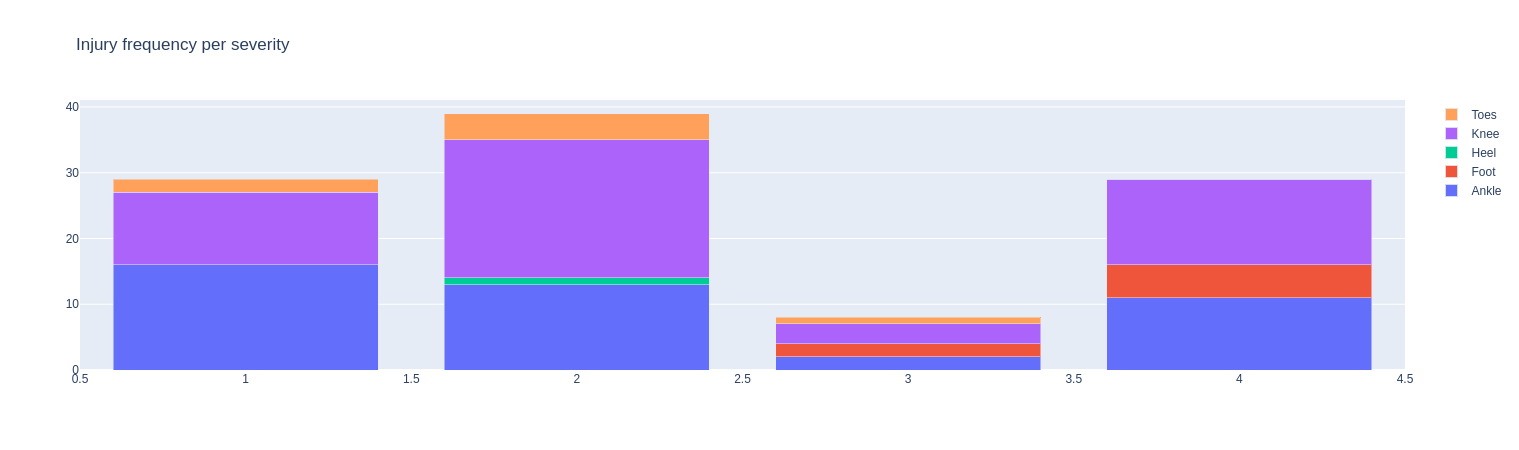

In [250]:
data = [
    go.Bar(                                                  # trace 1
    x = [severity for severity in df_severity2.index],
    y = [value for value in df_severity2['Ankle']],
    name = 'Ankle'), 
    
    go.Bar(                                                  # trace 2
    x = [severity for severity in df_severity2.index],
    y = [value for value in df_severity2['Foot']],
    name = 'Foot'),
    
    go.Bar(                                                  # trace 3
    x = [severity for severity in df_severity2.index],
    y = [value for value in df_severity2['Heel']],
    name = 'Heel'),
    
    go.Bar(                                                  # trace 4
    x = [severity for severity in df_severity2.index],
    y = [value for value in df_severity2['Knee']],
    name = 'Knee'),
    
    go.Bar(                                                  # trace 5
    x = [severity for severity in df_severity2.index],
    y = [value for value in df_severity2['Toes']],
    name = 'Toes')
]
        
# create a layout, remember to set the barmode here

layout = go.Layout(
    title = 'Injury frequency per severity'
)


# create a fig from data & layout, and plot the fig.

fig = go.Figure(data=data, layout=layout)
fig.update_layout(barmode = 'stack')
fig.show()

## Playlist

In [19]:
df2 = pd.read_csv('PlayList.csv')

In [20]:
df2.head()

,PlayerKey,GameID,PlayKey,RosterPosition,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,Position,PositionGroup
0,26624,26624-1,26624-1-1,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,1,QB,QB
1,26624,26624-1,26624-1-2,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,2,QB,QB
2,26624,26624-1,26624-1-3,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Rush,3,QB,QB
3,26624,26624-1,26624-1-4,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Rush,4,QB,QB
4,26624,26624-1,26624-1-5,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,5,QB,QB


In [6]:
df2.shape

(267005, 14)

In [18]:
len(df2['PlayerKey'].unique()) # 250 players total, 100 injured

250

In [50]:
len(df2['StadiumType'].unique())

30

In [7]:
df.isnull().sum() # missing 28 plays, drop those for data vis? Can't really use these rows, and all analysis on them has been done

PlayerKey     0
GameID        0
PlayKey      28
BodyPart      0
Surface       0
DM_M1         0
DM_M7         0
DM_M28        0
DM_M42        0
dtype: int64

In [21]:
df_for_merge = df.dropna()

In [22]:
df_merge = df_for_merge.merge(df2, how='left', on='PlayKey')
df_merge.drop(['PlayerKey_y', 'GameID_y'], axis=1, inplace=True)
df_merge.rename(columns={'PlayerKey_x': 'PlayerKey', 'GameID_x': 'GameID'}, inplace=True)

In [11]:
df_merge.head()

,PlayerKey,GameID,PlayKey,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42,RosterPosition,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,Position,PositionGroup
0,39873,39873-4,39873-4-32,Knee,Synthetic,1,1,1,1,Linebacker,29,4,Indoors,Synthetic,84,Cloudy,Punt,32,OLB,LB
1,46074,46074-7,46074-7-26,Knee,Natural,1,1,0,0,Linebacker,50,7,Open,Natural,76,Partly Cloudy,Punt,26,OLB,LB
2,36557,36557-1,36557-1-70,Ankle,Synthetic,1,1,1,1,Safety,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,70,SS,DB
3,46646,46646-3,46646-3-30,Ankle,Natural,1,0,0,0,Linebacker,15,3,Outdoor,Natural,80,Cloudy,Punt,30,LB,LB
4,43532,43532-5,43532-5-69,Ankle,Synthetic,1,1,1,1,Wide Receiver,32,5,Retractable Roof,Synthetic,89,Partly Cloudy,Kickoff,69,WR,WR


In [14]:
df_merge.to_csv(r'./df_for_stats.csv', index = False)

In [19]:
df_merge.isnull().sum()

PlayerKey         0
GameID            0
PlayKey           0
BodyPart          0
Surface           0
DM_M1             0
DM_M7             0
DM_M28            0
DM_M42            0
RosterPosition    0
PlayerDay         0
PlayerGame        0
StadiumType       4
FieldType         0
Temperature       0
Weather           3
PlayType          0
PlayerGamePlay    0
Position          0
PositionGroup     0
dtype: int64

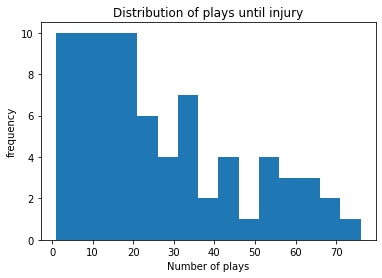

In [23]:
# histogram of PlayerGamePLay
plt.hist(df_merge['PlayerGamePlay'], bins=15)
plt.xlabel('Number of plays')
plt.ylabel('frequency')
plt.title('Distribution of plays until injury')
plt.show()
# does not show much... a lot of injuries actually happen at a lower number of plays, drops off, and picks back up

In [9]:
from matplotlib.pyplot import figure

In [60]:
# Position vs injury
position = df_merge.groupby(by='Position')['PlayerKey'].count().sort_values(ascending=False).reset_index()

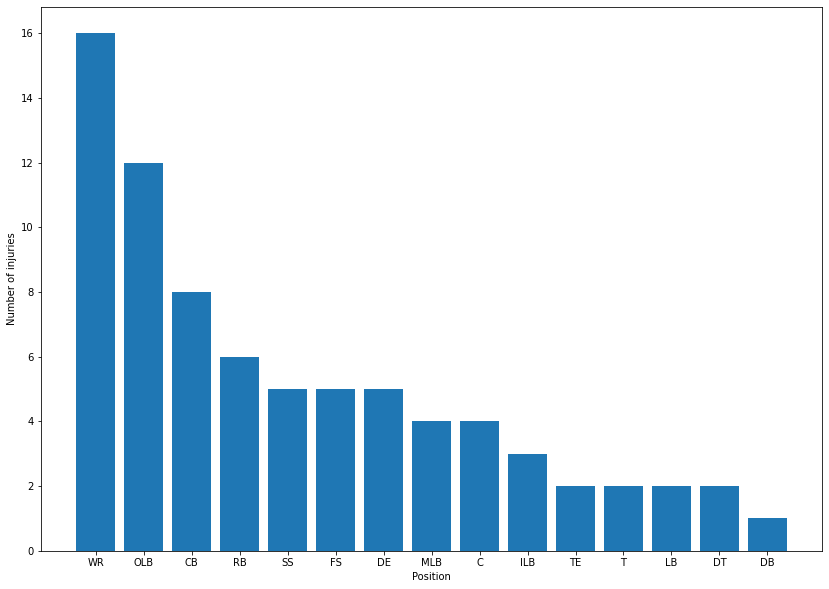

In [61]:
figure(figsize=(14,10))
plt.bar(position['Position'], position['PlayerKey'])
plt.xlabel('Position')
plt.ylabel('Number of injuries')
plt.show()

Positions:
* WR = Wide Receiver (O)
* OLB = Outside Linebackers (D)
* CB = Cornerback (D)
* RB = Running Back (O)
* SS = Strong safety (D)
* FS = Free safety (D)
* DE = Defensive end (D)
* MLB = Middle linebacker (D)
* C = Center (O)
* ILB = Inside linenacker (D)
* TE = Tight end (O)
* T = Tight end (O)
* LB = Linebacker (D)
* DT = Defensive tackle (D)
* DB = Defensive Back (D)

In [51]:
# PlayType vs injury
playtype = df_merge.groupby(by='PlayType')['PlayerKey'].count().sort_values(ascending=False).reset_index()

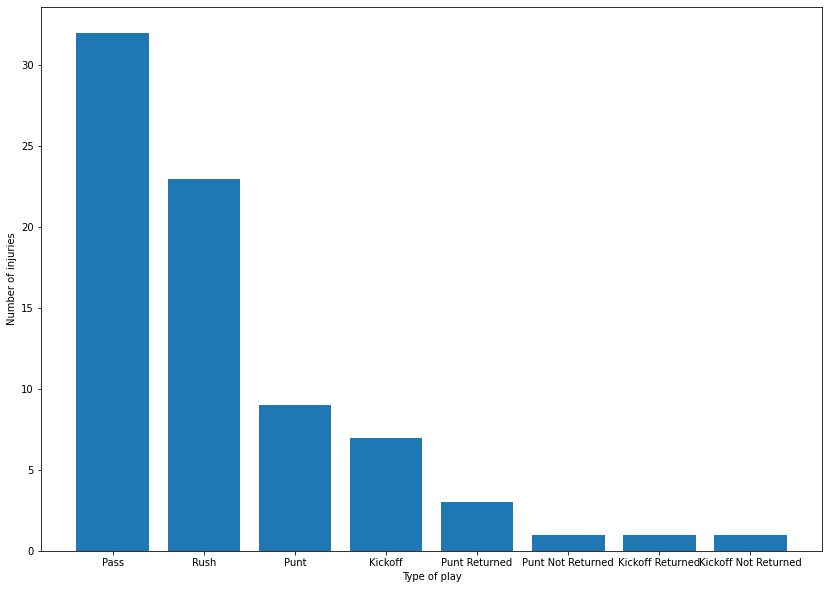

In [76]:
figure(figsize=(14,10))
plt.bar(playtype['PlayType'], playtype['PlayerKey'])
plt.xlabel('Type of play')
plt.ylabel('Number of injuries')
plt.show()
# pass and rush are the plays that most often results in injuries, and they are contact injuries

In [63]:
df_merge['PlayerGame'].unique()

array([ 4,  7,  1,  3,  5,  2, 10,  8, 13, 11,  6,  9, 20, 30, 15, 12, 23,
       28, 29, 17, 16, 18, 19, 14])

In [25]:
games = df_merge.groupby(by='PlayerGame')['PlayerKey'].count().reset_index()
games.head(10)

,PlayerGame,PlayerKey
0,1,5
1,2,6
2,3,8
3,4,5
4,5,6
5,6,4
6,7,7
7,8,8
8,9,3
9,10,4


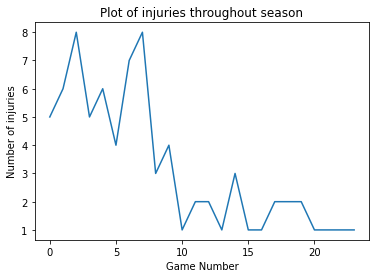

In [26]:
plt.plot(games['PlayerKey'])
plt.xlabel('Game Number')
plt.ylabel('Number of injuries')
plt.title('Plot of injuries throughout season')
plt.show()
# lots of injury at the beginning of the season, drops off as season goes on

In [15]:
df2.head()

,PlayerKey,GameID,PlayKey,RosterPosition,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,Position,PositionGroup
0,26624,26624-1,26624-1-1,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,1,QB,QB
1,26624,26624-1,26624-1-2,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,2,QB,QB
2,26624,26624-1,26624-1-3,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Rush,3,QB,QB
3,26624,26624-1,26624-1-4,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Rush,4,QB,QB
4,26624,26624-1,26624-1-5,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,5,QB,QB


In [16]:
# analyze gameID
len(df2['GameID'].unique()) # there are 5712 games

5712

In [36]:
field = df2['FieldType'].value_counts().reset_index()
field.head()

,index,FieldType
0,Natural,156902
1,Synthetic,110103


In [61]:
x = field.iloc[0,1] / (field.iloc[0,1] + field.iloc[1,1]) * 100
y = field.iloc[1,1] / (field.iloc[0,1] + field.iloc[1,1]) * 100
percentage = [x, y]
field['percentage'] = percentage
field.head()

,index,FieldType,percentage
0,Natural,156902,58.763694
1,Synthetic,110103,41.236306


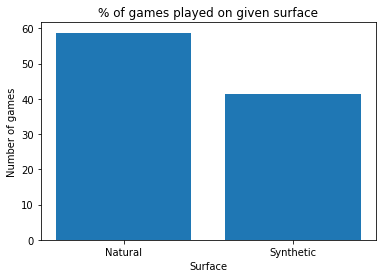

In [64]:
plt.bar(field['index'], field['percentage'])
plt.xlabel('Surface')
plt.ylabel('Number of games')
plt.title('% of games played on given surface')
plt.show()
# interesting to see, there were more injuries on synthetic fields, yet a lot more games were played on natural field

In [24]:
len(df2['PlayKey'].unique()) # 267,005 plays, only 100 resulted in injury

267005

In [20]:
df2.head()

,PlayerKey,GameID,PlayKey,RosterPosition,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,Position,PositionGroup
0,26624,26624-1,26624-1-1,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,1,QB,QB
1,26624,26624-1,26624-1-2,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,2,QB,QB
2,26624,26624-1,26624-1-3,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Rush,3,QB,QB
3,26624,26624-1,26624-1-4,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Rush,4,QB,QB
4,26624,26624-1,26624-1-5,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,5,QB,QB


In [21]:
df_merge.head()

,PlayerKey,GameID,PlayKey,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42,RosterPosition,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,Position,PositionGroup
0,39873,39873-4,39873-4-32,Knee,Synthetic,1,1,1,1,Linebacker,29,4,Indoors,Synthetic,84,Cloudy,Punt,32,OLB,LB
1,46074,46074-7,46074-7-26,Knee,Natural,1,1,0,0,Linebacker,50,7,Open,Natural,76,Partly Cloudy,Punt,26,OLB,LB
2,36557,36557-1,36557-1-70,Ankle,Synthetic,1,1,1,1,Safety,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,70,SS,DB
3,46646,46646-3,46646-3-30,Ankle,Natural,1,0,0,0,Linebacker,15,3,Outdoor,Natural,80,Cloudy,Punt,30,LB,LB
4,43532,43532-5,43532-5-69,Ankle,Synthetic,1,1,1,1,Wide Receiver,32,5,Retractable Roof,Synthetic,89,Partly Cloudy,Kickoff,69,WR,WR


# Player Track Data

In [3]:
# something going wrong with this dataset..can load it sometimes, other times won't work
df3 = pd.read_csv('PlayerTrackData.csv',      
                        dtype={'time':'float64',
                                'x':'float16',
                                'y':'float16',
                                'dir': 'float16',
                                'dis': 'float16',
                                'o':'float16',
                                's':'float16'})

In [4]:
df3.head()

,PlayKey,time,event,x,y,dir,dis,o,s
0,26624-1-1,0.0,huddle_start_offense,87.4375,28.937500,288.25,0.010002,262.25,0.130005
1,26624-1-1,0.1,NaN,87.4375,28.921875,284.00,0.010002,261.75,0.119995
2,26624-1-1,0.2,NaN,87.4375,28.921875,280.50,0.010002,261.25,0.119995
3,26624-1-1,0.3,NaN,87.4375,28.921875,278.75,0.010002,260.75,0.099976
4,26624-1-1,0.4,NaN,87.4375,28.921875,275.50,0.010002,260.25,0.090027


* Orientation = where the player is currently facing
* Direction = where the player is currently going 

If a player is for example looking at 12 o'clock (0 degrees orientation) but moving towards 3 o'clock (90 degrees direction), they are moving laterally

In [5]:
df3.shape # Low x means close to home end zone, high x means close to visitor end zone

(76366748, 9)

In [19]:
filt = df3['PlayKey'] == '39873-4-32'
injury_1 = df3[filt] # play from beginning to end of injury play

In [20]:
injury_1.head() # s is in yards per second

,PlayKey,time,event,x,y,dir,dis,o,s
25389734,39873-4-32,0.0,punt_play,56.71875,17.296875,356.25,0.180054,250.000,1.830078
25389735,39873-4-32,0.1,NaN,56.75000,17.484375,355.75,0.180054,248.500,1.820312
25389736,39873-4-32,0.2,NaN,56.71875,17.656250,355.50,0.180054,247.000,1.809570
25389737,39873-4-32,0.3,NaN,56.68750,17.843750,355.75,0.180054,245.125,1.790039
25389738,39873-4-32,0.4,NaN,56.68750,18.015625,356.00,0.180054,243.000,1.759766


In [32]:
df_merge.head() # check the tracks for every injury play 

,PlayerKey,GameID,PlayKey,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42,RosterPosition,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,Position,PositionGroup
0,39873,39873-4,39873-4-32,Knee,Synthetic,1,1,1,1,Linebacker,29,4,Indoors,Synthetic,84,Cloudy,Punt,32,OLB,LB
1,46074,46074-7,46074-7-26,Knee,Natural,1,1,0,0,Linebacker,50,7,Open,Natural,76,Partly Cloudy,Punt,26,OLB,LB
2,36557,36557-1,36557-1-70,Ankle,Synthetic,1,1,1,1,Safety,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,70,SS,DB
3,46646,46646-3,46646-3-30,Ankle,Natural,1,0,0,0,Linebacker,15,3,Outdoor,Natural,80,Cloudy,Punt,30,LB,LB
4,43532,43532-5,43532-5-69,Ankle,Synthetic,1,1,1,1,Wide Receiver,32,5,Retractable Roof,Synthetic,89,Partly Cloudy,Kickoff,69,WR,WR
